# "Wine Quality."

### _"Quality ratings of Portuguese white wines" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 12 columns and 4898 entries of data about Portuguese white wines.
    
**Метаданные:**
    
* **fixed acidity** 

* **volatile acidity**

* **citric acid** 

* **residual sugar** 

* **chlorides** 

* **free sulfur dioxide** 

* **total sulfur dioxide**

* **density** 

* **pH** 

* **sulphates** 

* **alcohol** 

* **quality** - score between 3 and 9


### Questions:
    
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### Encoding 'quality' attribute
* ### 'quality' attribute value counts and visualisation
* ### Resampling of an imbalanced dataset
* ### Random under-sampling of an imbalanced dataset
* ### Random over-sampling of an imbalanced dataset
* ### Initialisation of target
* ### Drop column 'quality'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate models without hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score
* ### Build, train and evaluate models with hyperparameters
    * #### Logistic Regression, K-Nearest Neighbors, Decision Trees 
    * #### Classification report
    * #### Confusion Matrix
    * #### ROC-AUC score

## [Conclusion](#Conclusion.)



## Part 1: Import, Load Data.

* ### Import libraries

In [70]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


* ### Read data from ‘.csv’ file

In [71]:
# read data from '.csv' file
dataset = pd.read_csv('winequality.csv')

## Part 2: Exploratory Data Analysis.

* ### Info

In [72]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Dataset consist of 4898 rows and 12 columns.

has 2 datatypes: float64(11), integer64(1)

has no missing values

* ### Head

In [73]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


* ### Describe

In [74]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Задача классифицировать вина на плохие и хорошие. Атрибута "Y" подобного нет, четкого отета нет. Но есть атрибут "quality", который отечает за оценку качеста вина и из, которого мы можем создать атрибут "Y" с ответом для обучения модели. Атрибут "quality" содержит значения от 3 до 9 (посмотрела в CSV файле), где 3 "Not Good" и 9 - "Good", соответстенно чем выше число тем качество вина выше.

* ### Encoding 'quality' attribute

In [75]:
# lambda function; wine quality from 3-6 == 0, from 7-9 == 1.
dataset['quality'] = dataset.quality.apply(lambda q: 0 if q <=6 else 1)

In [76]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


* ### 'quality' attribute value counts and visualisation

In [77]:
print ('Not good wine', round(dataset['quality'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print ('Good wine', round(dataset['quality'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')
dataset['quality'].value_counts()

Not good wine 78.36 % of the dataset
Good wine 21.64 % of the dataset


0    3838
1    1060
Name: quality, dtype: int64

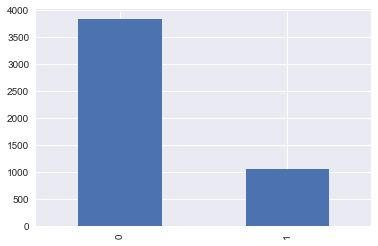

In [78]:
# visualisation plotby bar 
dataset['quality'].value_counts().plot(x = dataset['quality'], kind='bar')

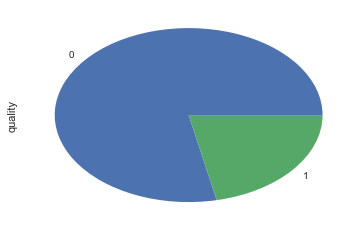

In [79]:
# visualisation plot by pie
dataset['quality'].value_counts().plot(x = dataset['quality'], kind = 'pie')

There are 78.36 % of "Not good" quality wines an only 21.64 % of "Good" quality wines in our dataset. So we can see that the dataset is imbalanced.

In [80]:
# class count
count_class_0, count_class_1 = dataset.quality.value_counts()

# divide by class
class_0 = dataset[dataset['quality'] == 0]
class_1 = dataset[dataset['quality'] == 1]

In [81]:
# class count
class_1_over = class_1.sample(count_class_0, replace=True)


# checking of items after oversampling of 1 class
print(count_class_0, count_class_1)
check_nomber_class_1_after_sample = class_1_over.quality.value_counts()
print("Quantity of items after oversampling of 1 class", check_nomber_class_1_after_sample)

3838 1060
Quantity of items after oversampling of 1 class 1    3838
Name: quality, dtype: int64


### Random over-sampling of an imbalanced dataset 

Random over-sampling:
1    3838
0    3838
Name: quality, dtype: int64


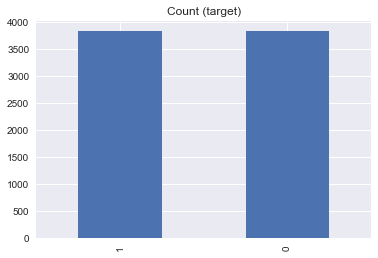

In [82]:
# divide by class
dataset_over = pd.concat([class_0, class_1_over], axis=0)


print('Random over-sampling:')
print(dataset_over.quality.value_counts())

dataset_over.quality.value_counts().plot(kind='bar', title='Count (target)');

* ### Initialisation of target

In [83]:
# initialisation of target for over-sampling dataset
target_over = dataset_over['quality'] 

* ### Drop column 'quality'

In [84]:
dataset_over = dataset_over.drop(['quality'], axis = 1)

## Part 3: Data Wrangling and Transformation.

* ### StandardScaler

In [85]:
# StandardScaler for over-sampling dataset
sc = StandardScaler()

dataset_sc = sc.fit_transform(dataset_over)

dataset_sc = pd.DataFrame(dataset_sc)
dataset_sc.head()


,0,1,2,3,4,5,6,7,8,9,10
0,0.220289,-0.037357,0.259523,3.021528,0.096439,0.624788,0.908419,2.479864,-1.273796,-0.353523,-1.539611
1,-0.634554,0.267319,0.074847,-0.912824,0.306503,-1.319451,-0.046456,0.170642,0.677313,-0.020816,-1.006473
2,1.563615,0.064202,0.628876,0.178908,0.359019,-0.315973,-0.925946,0.533520,0.417165,-0.436700,-0.549497
3,0.464530,-0.443592,-0.109829,0.508487,0.779148,0.750223,1.310471,0.698464,-0.038094,-0.769408,-0.701822
4,0.464530,-0.443592,-0.109829,0.508487,0.779148,0.750223,1.310471,0.698464,-0.038094,-0.769408,-0.701822


* ### Creating datasets for ML part

In [86]:
# set 'X' for features' and y' for the target ('quality').
# for over-sampling dataset 

y = target_over
X = dataset_sc.copy()

In [87]:
# preview of the first 5 lines of the loaded data 
X.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.220289,-0.037357,0.259523,3.021528,0.096439,0.624788,0.908419,2.479864,-1.273796,-0.353523,-1.539611
1,-0.634554,0.267319,0.074847,-0.912824,0.306503,-1.319451,-0.046456,0.170642,0.677313,-0.020816,-1.006473
2,1.563615,0.064202,0.628876,0.178908,0.359019,-0.315973,-0.925946,0.533520,0.417165,-0.436700,-0.549497
3,0.464530,-0.443592,-0.109829,0.508487,0.779148,0.750223,1.310471,0.698464,-0.038094,-0.769408,-0.701822
4,0.464530,-0.443592,-0.109829,0.508487,0.779148,0.750223,1.310471,0.698464,-0.038094,-0.769408,-0.701822


* ### 'Train\Test' split

In [88]:
# apply 'Train\Test' splitting method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [89]:
# print shape of X_train and y_train
X_train.shape, y_train.shape

((6140, 11), (6140,))

In [90]:
# print shape of X_test and y_test
X_test.shape, y_test.shape

((1536, 11), (1536,))

## Part 4: Machine Learning.

* ### Build, train and evaluate models without hyperparameters

* Logistic Regression
* K-Nearest Neighbors
* Decision Trees


In [91]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

# K-Nearest Neighbors
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

# Decision Tree
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
DT_pred = DT.predict(X_test)

* ### Classification report

In [92]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print ("accuracy of LR Classification Report accuracy: \n", accuracy_score(y_test, LR_pred))
print ("\n ")

print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print ("accuracy of KNN Classification Report: \n", accuracy_score(y_test, KNN_pred))
print ("\n ")

print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))
print ("accuracy of DT Classification Report: \n", accuracy_score(y_test, DT_pred))
print ("\n ")

LR Classification Report: 
              precision    recall  f1-score   support

          0   0.738265  0.677546  0.706603       766
          1   0.703481  0.761039  0.731129       770

avg / total   0.720828  0.719401  0.718898      1536

accuracy of LR Classification Report accuracy: 
 0.719401041667

 
KNN Classification Report: 
              precision    recall  f1-score   support

          0   0.937397  0.742820  0.828842       766
          1   0.787944  0.950649  0.861683       770

avg / total   0.862476  0.847005  0.845305      1536

accuracy of KNN Classification Report: 
 0.847005208333

 
DT Classification Report: 
              precision    recall  f1-score   support

          0   0.977843  0.864230  0.917533       766
          1   0.878929  0.980519  0.926949       770

avg / total   0.928257  0.922526  0.922253      1536

accuracy of DT Classification Report: 
 0.922526041667

 


* ### Confusion matrix

In [93]:
LR_confusion_mx = confusion_matrix(y_test, LR_pred)
print("LR Confusion Matrix: \n", LR_confusion_mx)
print()
KNN_confusion_mx = confusion_matrix(y_test, KNN_pred)
print("KNN Confusion Matrix: \n", KNN_confusion_mx)
print()
DT_confusion_mx = confusion_matrix(y_test, DT_pred)
print("DT Confusion Matrix: \n", DT_confusion_mx)
print()

LR Confusion Matrix: 
 [[519 247]
 [184 586]]

KNN Confusion Matrix: 
 [[569 197]
 [ 38 732]]

DT Confusion Matrix: 
 [[662 104]
 [ 15 755]]



* ### ROC-AUC score

In [94]:
roc_auc_score(DT_pred, y_test)

0.92838620703886043

In [95]:
roc_auc_score(KNN_pred, y_test)

0.86267053021530293

In [96]:
roc_auc_score(LR_pred, y_test)

0.72087298646343323

* ### Build, train and evaluate models with hyperparameters

In [102]:
# Logistic Regression

LR = LogisticRegression()
LR_params = {'C':[1,2,4,5,6,7,8,9,10], 'penalty':['elasticnet', 'l1', 'l2', 'none'], 'solver':['saga'], 'random_state':[0]}
LR1 = GridSearchCV(LR, param_grid = LR_params)
LR1.fit(X_train, y_train)
LR1_pred = LR1.predict(X_test)


# K-Nearest Neighbors

KNN = KNeighborsClassifier()
KNN_params = {'n_neighbors':[5,7,9,11]}
KNN1 = GridSearchCV(KNN, param_grid = KNN_params)             
KNN1.fit(X_train, y_train)
KNN1_pred = KNN1.predict(X_test)


# Decision Tree

DT = DecisionTreeClassifier()
DT_params = {'max_depth':[2,10,15,20], 'criterion':['gini', 'entropy'], 'random_state':[0]}
DT1 = GridSearchCV(DT, param_grid = DT_params)
DT1.fit(X_train, y_train)
DT1_pred = DT1.predict(X_test)

In [103]:
# print the best hyper parameters set

print("Logistic Regression Best Hyper Parameters:   ", LR1.best_params_)
print("K-Nearest Neighbour Best Hyper Parameters:   ", KNN1.best_params_)
print("Decision Tree Best Hyper Parameters:         ", DT1.best_params_)

Logistic Regression Best Hyper Parameters:    {'C': 2, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}
K-Nearest Neighbour Best Hyper Parameters:    {'n_neighbors': 5}
Decision Tree Best Hyper Parameters:          {'criterion': 'gini', 'max_depth': 20, 'random_state': 0}


* ### Classification report

In [104]:
print("LR Classification Report: \n", classification_report(y_test, LR_pred, digits = 6))
print ("LR Classification Report accuracy: \n", accuracy_score(y_test, LR1_pred))
print ("\n ")

print("KNN Classification Report: \n", classification_report(y_test, KNN_pred, digits = 6))
print ("KNN Classification Report accuracy:: \n", accuracy_score(y_test, KNN1_pred))
print ("\n ")

print("DT Classification Report: \n", classification_report(y_test, DT_pred, digits = 6))
print ("DT Classification Report accuracy:: \n", accuracy_score(y_test, DT1_pred))
print ("\n ")

LR Classification Report: 
              precision    recall  f1-score   support

          0   0.738265  0.677546  0.706603       766
          1   0.703481  0.761039  0.731129       770

avg / total   0.720828  0.719401  0.718898      1536

LR Classification Report accuracy: 
 0.716145833333

 
KNN Classification Report: 
              precision    recall  f1-score   support

          0   0.937397  0.742820  0.828842       766
          1   0.787944  0.950649  0.861683       770

avg / total   0.862476  0.847005  0.845305      1536

KNN Classification Report accuracy:: 
 0.847005208333

 
DT Classification Report: 
              precision    recall  f1-score   support

          0   0.977843  0.864230  0.917533       766
          1   0.878929  0.980519  0.926949       770

avg / total   0.928257  0.922526  0.922253      1536

DT Classification Report accuracy:: 
 0.919270833333

 


* ### Confusion matrix

DT Confusion Matrix


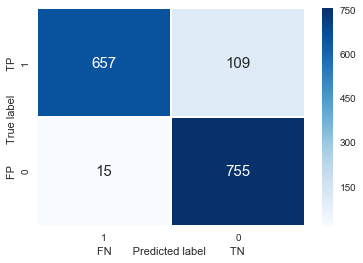

In [105]:
# confusion matrix of DT model
DT_confusion_mx = confusion_matrix(y_test, DT1_pred)
print('DT Confusion Matrix')

# visualisation
ax = plt.subplot()
sns.heatmap(DT_confusion_mx, annot = True, fmt = 'd', cmap = 'Blues', ax = ax, linewidths = 0.5, annot_kws = {'size': 15})
ax.set_ylabel('FP       True label        TP')
ax.set_xlabel('FN       Predicted label        TN')
ax.xaxis.set_ticklabels(['1', '0'], fontsize = 10)
ax.yaxis.set_ticklabels(['1', '0'], fontsize = 10)
plt.show()
print() 

* ### ROC-AUC score

In [106]:
roc_auc_score(DT1_pred, y_test)

0.92576058201058198

##  Conclusion.

In [109]:
# submission of .csv file with predictions
sub = pd.DataFrame()
sub['ID'] = X_test.index
sub['quality'] = DT1_pred
sub.to_csv('WinePredictionsTestOverSamplingHomeWork.csv', index=False)

**Question**: 
Predict which wines are 'Good/1' and 'Not Good/0' (use binary classification; check balance of classes; calculate perdictions; choose the best model).

**Answers**:
1. Binary classification was applied.
2. Classes were highly imbalanced with 78.36 % of '0' class and only 21.64 % of '1' class in our dataset.
3. Three options were applied in order to calculate the best predictions:

    * Calculate predictions with imbalanced dataset
    * Calculate predictions with random under-sampling technique of an imbalanced dataset
    * Calculate predictions with random over-sampling technique of an imbalanced dataset

4. Three ML models were used: Logistic Regression, KNN, Decision Tree (without and with hyper parameters).
5. The best result was choosen:

    * Random over-sampling dataset with 3838 enteties in class '0' and 3838 enteties in class '1', 7676 enteties in total.
    * Train/Test split: test_size=0.2, random_state=0
    * Decision Tree model without hyper parameters tuning, with an accuracy score equal ... and ROC-AUC score equal ... .


